# Approximate q-learning

In this notebook you will teach a __tensorflow__ neural network to do Q-learning.

__Frameworks__ - we'll accept this homework in any deep learning framework. This particular notebook was designed for tensorflow, but you will find it easy to adapt it to almost any python-based deep learning framework.

**Packages:**

In [1]:
!pip install --upgrade pip
!pip install matplotlib
!pip install --upgrade cython
!pip install tqdm
!pip install pandas==0.17.1
!pip install gym==0.9.5
!pip install --upgrade https://github.com/yandexdataschool/AgentNet/archive/master.zip

Requirement already up-to-date: pip in /Users/ya-philya/anaconda3/lib/python3.6/site-packages (18.1)
Requirement already up-to-date: cython in /Users/ya-philya/anaconda3/lib/python3.6/site-packages (0.29)
    100% |████████████████████████████████| 6.7MB 822kB/s ta 0:00:011
  Running setup.py bdist_wheel for pandas ... error
  Complete output from command /Users/ya-philya/anaconda3/bin/python -u -c "import setuptools, tokenize;__file__='/private/var/folders/vy/n_wd9f6950s5s0v1wt63bypdgtnbjn/T/pip-install-z93wziha/pandas/setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" bdist_wheel -d /private/var/folders/vy/n_wd9f6950s5s0v1wt63bypdgtnbjn/T/pip-wheel-jxohiw6s --python-tag cp36:
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build/lib.macosx-10.7-x86_64-3.6
  creating build/lib.macosx-10.7-x86_64-3.6/pandas
  copying pandas/_version.py -> build/lib.macosx-10.7-x8

                                                                                                                                            ^~~~~~~
  pandas/tslib.c:48370:138: warning: code will never be executed [-Wunreachable-code]
          __pyx_t_7 = PyTuple_GET_ITEM(__pyx_t_1, __pyx_t_5); __Pyx_INCREF(__pyx_t_7); __pyx_t_5++; if (unlikely(0 < 0)) {__pyx_filename = __pyx_f[0]; __pyx_lineno = 2728; __pyx_clineno = __LINE__; goto __pyx_L1_error;}
                                                                                                                                           ^~~~~~~
  pandas/tslib.c:48362:137: warning: code will never be executed [-Wunreachable-code]
          __pyx_t_7 = PyList_GET_ITEM(__pyx_t_1, __pyx_t_5); __Pyx_INCREF(__pyx_t_7); __pyx_t_5++; if (unlikely(0 < 0)) {__pyx_filename = __pyx_f[0]; __pyx_lineno = 2728; __pyx_clineno = __LINE__; goto __pyx_L1_error;}
                                                                                              

Failed to build pandas
  Found existing installation: pandas 0.23.4
    Uninstalling pandas-0.23.4:
      Successfully uninstalled pandas-0.23.4
  Running setup.py install for pandas ... error
    Complete output from command /Users/ya-philya/anaconda3/bin/python -u -c "import setuptools, tokenize;__file__='/private/var/folders/vy/n_wd9f6950s5s0v1wt63bypdgtnbjn/T/pip-install-z93wziha/pandas/setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" install --record /private/var/folders/vy/n_wd9f6950s5s0v1wt63bypdgtnbjn/T/pip-record-r8w0h20g/install-record.txt --single-version-externally-managed --compile:
    running install
    running build
    running build_py
    creating build
    creating build/lib.macosx-10.7-x86_64-3.6
    creating build/lib.macosx-10.7-x86_64-3.6/pandas
    copying pandas/_version.py -> build/lib.macosx-10.7-x86_64-3.6/pandas
    copying pandas/__init__.py -> build/lib.macosx-10.7-

    /Users/ya-philya/anaconda3/lib/python3.6/site-packages/numpy/core/include/numpy/ndarrayobject.h:50:35: note: expanded from macro 'PyArray_IsScalar'
            (PyObject_TypeCheck(obj, &Py##cls##ArrType_Type))
                                      ^
    <scratch space>:75:1: note: expanded from here
    PyComplexFloatingArrType_Type
    ^
    /Users/ya-philya/anaconda3/lib/python3.6/site-packages/numpy/core/include/numpy/__multiarray_api.h:657:57: note: expanded from macro 'PyComplexFloatingArrType_Type'
    #define PyComplexFloatingArrType_Type (*(PyTypeObject *)PyArray_API[17])
                                                            ^
    pandas/src/numpy_helper.h:60:1: note: use 'static' to give inline function 'is_complex_object' internal linkage
    PANDAS_INLINE int
    ^
    static
    pandas/src/helper.h:6:27: note: expanded from macro 'PANDAS_INLINE'
        #define PANDAS_INLINE __inline__
                              ^
    /Users/ya-philya/anaconda3/lib/python3.6/si

Command "/Users/ya-philya/anaconda3/bin/python -u -c "import setuptools, tokenize;__file__='/private/var/folders/vy/n_wd9f6950s5s0v1wt63bypdgtnbjn/T/pip-install-z93wziha/pandas/setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" install --record /private/var/folders/vy/n_wd9f6950s5s0v1wt63bypdgtnbjn/T/pip-record-r8w0h20g/install-record.txt --single-version-externally-managed --compile" failed with error code 1 in /private/var/folders/vy/n_wd9f6950s5s0v1wt63bypdgtnbjn/T/pip-install-z93wziha/pandas/
    100% |████████████████████████████████| 133kB 1.1MB/s ta 0:00:01
    100% |████████████████████████████████| 1.0MB 14.2MB/s ta 0:00:01
    100% |████████████████████████████████| 829kB 2.7MB/s ta 0:00:01
  Running setup.py bdist_wheel for gym ... done
  Stored in directory: /Users/ya-philya/Library/Caches/pip/wheels/af/8a/d1/ad80c7cb740eea4ae7fa832d3b9de003867236347214e2e514
  Running setup.py bdist_whe

In [1]:
#XVFB will be launched if you run on a server
import os
if os.environ.get("DISPLAY") is str and len(os.environ.get("DISPLAY"))!=0:
    !bash ../xvfb start
    %env DISPLAY=:1

In [2]:
import gym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

[2018-11-14 15:37:30,935] Making new env: CartPole-v0


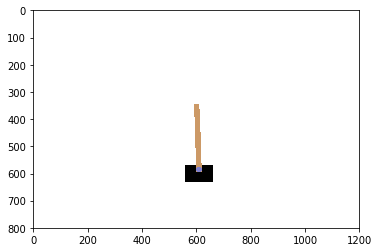

In [3]:
env = gym.make("CartPole-v0")
env.reset()
n_actions = env.action_space.n
state_dim = env.observation_space.shape

plt.imshow(env.render("rgb_array"))

# Approximate (deep) Q-learning: building the network

First step is initializing input variables

**Tensorflow 1.11.0 version required.**

In [4]:
import tensorflow as tf
print('tensorflow version: ' + str(tf.__version__))

tensorflow version: 1.12.0


In [5]:
!pip install --upgrade tensorflow

Requirement already up-to-date: tensorflow in /Users/ya-philya/anaconda3/lib/python3.6/site-packages (1.12.0)


In [6]:
import tensorflow as tf
print('tensorflow version: ' + str(tf.__version__))

tensorflow version: 1.12.0


In [7]:
import tensorflow.contrib.layers as tflayers  # Let's make TF simple again

In [5]:
#create input variables. We'll support multiple states at once
current_states = tf.placeholder(dtype=tf.float32,shape=(None,)+state_dim)
actions = tf.placeholder(tf.int32,shape=[None])
rewards = tf.placeholder(tf.float32,shape=[None])
next_states = tf.placeholder(tf.float32, shape=(None,)+state_dim)
is_end = tf.placeholder(tf.bool,shape=[None])

In [6]:
def network(l_states, scope=None, reuse=False):
    assert l_states.get_shape().as_list() == list((None,)+state_dim)
    with tf.variable_scope(scope or "network") as scope:
        if reuse:
            scope.reuse_variables()
        
        # <Your architecture. Please start with a single-layer network>

        return l_qvalues

#### Predicting Q-values for `current_states`

In [ ]:
#get q-values for ALL actions in current_states
predicted_qvalues = network(current_states)

In [ ]:
#select q-values for chosen actions
predicted_qvalues_for_actions = <...>

#### Loss function and `update`
Here we write a function similar to `agent.update`.

In [ ]:
predicted_next_qvalues = network(<...>, reuse=True)
gamma = 0.99
target_qvalues_for_actions = <target Q-values using rewards and predicted_next_qvalues>
target_qvalues_for_actions = tf.where(
    is_end, 
    tf.zeros_like(target_qvalues_for_actions),
    target_qvalues_for_actions)

In [ ]:
#mean squared error loss function
loss = <mean squared between target_qvalues_for_actions and predicted_qvalues_for_actions>

In [ ]:
#network updates. Note the small learning rate (for stability)
#Training function that resembles agent.update(state,action,reward,next_state) 
#with 1 more argument meaning is_end
train_step = tf.train.AdamOptimizer(1e-4).minimize(
    loss, var_list=tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope="network"))

### Playing the game

In [12]:
# Tensorflow feature - session
sess = tf.InteractiveSession()

In [ ]:
# Tensorflow feature 2 - variables initializer
sess.run(tf.global_variables_initializer())

In [7]:
# You can check all your valiables by:
# [v.name for v in tf.trainable_variables()]
# they should all starts with "network"

In [ ]:
inial_epsilon = epsilon = 0.5
final_epsilon = 0.01
n_epochs = 1000

def generate_session(t_max=1000):
    """play env with approximate q-learning agent and train it at the same time"""
    
    total_reward = 0
    s = env.reset()
    total_loss = 0
    
    for t in range(t_max):
        
        #get action q-values from the network
        q_values = sess.run(
            predicted_qvalues, 
            feed_dict={current_states:np.array([s])})[0]
        
        a = <sample action with epsilon-greedy strategy>
        
        new_s,r,done,info = env.step(a)
        
        #train agent one step. Note that we use one-element arrays instead of scalars 
        #because that's what function accepts.
        curr_loss, _ = sess.run(
            ..., 
            feed_dict={
                ...})

        total_reward += r
        total_loss += curr_loss
        
        s = new_s
        if done: break
            
    return total_reward, total_loss/float(t), t

In [ ]:
from tqdm import trange
tr = trange(
    n_epochs,
    desc="mean reward = {:.3f}\tepsilon = {:.3f}\tloss = {:.3f}\tsteps = {:.3f}".format(0.0, 0.0, 0.0, 0.0),
    leave=True)


for i in tr:
    
    sessions = [generate_session() for _ in range(100)] #generate new sessions
    session_rewards, session_loss, session_steps = map(np.array, zip(*sessions))
    
    epsilon -= (inial_epsilon - final_epsilon) / float(n_epochs)
    
    tr.set_description("mean reward = {:.3f}\tepsilon = {:.3f}\tloss = {:.3f}\tsteps = {:.3f}".format(
        np.mean(session_rewards), epsilon, np.mean(session_loss), np.mean(session_steps)))

    if np.mean(session_rewards) > 300:
        print ("You Win!")
        break
        
    assert epsilon!=0, "Please explore environment"

### Video

In [10]:
epsilon=0 #Don't forget to reset epsilon back to initial value if you want to go on training

In [ ]:
#record sessions
import gym.wrappers
env = gym.wrappers.Monitor(env,directory="videos",force=True)
sessions = [generate_session() for _ in range(100)]
env.close()
#unwrap 
env = env.env.env
#upload to gym
#gym.upload("./videos/",api_key="<your_api_key>") #you'll need me later

#Warning! If you keep seeing error that reads something like"DoubleWrapError",
#run env=gym.make("CartPole-v0");env.reset();

In [ ]:
#show video
from IPython.display import HTML
import os

video_names = list(filter(lambda s:s.endswith(".mp4"),os.listdir("./videos/")))

HTML("""
<video width="640" height="480" controls>
  <source src="{}" type="video/mp4">
</video>
""".format("./videos/"+video_names[-1])) #this may or may not be _last_ video. Try other indices